# Chap 05
# 행렬 - Matrix

## 5.1 행렬이란 무엇인가?

### 5.1.1 전통적인 행렬
일반적으로, $m$개의 행과 $n$개의 열을 가진 행렬은 $m \times n$행렬이라 한다. 행렬 $A$에 대해 $i,j$ *원소* 는 $i$번쨰 행과 $j$번째 열에 있는 원소로 정의되며, 전통적으로 $a_{i,j}$ 또는 $a_{ij}$로 나타낸다. <br />따라서, $F$상의 모든 $i=1,...,m$과 $j=1,...,n$에 대하여 $a_{ij} \in F$일 때,

$$A = \begin{bmatrix} a_{ 11 } & a_{ 12 } & \cdots  & a_{ 1n } \\ a_{21} & a_{22} & \cdots & a_{2n} \\ \vdots & \vdots & \vdots & \vdots  \\ a_{m1} & a_{m2} & \cdots & a_{mn} \end{bmatrix}$$

을 $F$-위의 ($m \times n$)-행렬(($m \times n$)-matrix over $F$)이라고 한다.


### 5.1.2 행렬에 대해 알아보기

$F$상의 $D$-벡터를 집합 $D$에서 $F$로의 함수로 정의한거 처럼, $F$상의 $R \times C$ 행렬을 카테시안 곱 $R \times C$로의 함수로 정의한다. $R$의 원소를 *행 라벨* (row label) 이라 하고 $C$의 원소를 *열 라벨* (column label)이라 한다. <br />

**Example 5.1.3** 아래는 $R=$ `{'a', 'b'}`이고 $C=$`{'#', '@', '?'}`인 예이다. 

|      |  @   |  #   |  ?   |
| :--: | :--: | :--: | :--: |
|  a   |  1   |  2   |  3   |
|  b   |  10  |  20  |  30  |

### 5.1.3 행, 열, 엔트리

행렬의 유용한 점은 행과 열을 벡터로 해석할 수 있다. 위의 Example 5.1.3의 행렬을 아래와 같이 벡터로 나타낼 수 있다.

- 행 `a`는 벡터 [1, 2, 3] 이다.
- 행 `b`는 벡터 [10, 20, 30] 이다.
- 열 `@`는 벡터 [1, 10] 이다.
- 열 `#`은 벡터 [2, 20] 이다.
- 열 `?`는 벡터 [3, 30] 이다.

이번 5장에서는 행렬 구현 및 예제들을 파이썬의 고성능 수치 계산을 위한 모듈인 [NumPy](http://www.numpy.org/)를 사용한다. <br />numpy모듈을 이용하여 위의 Example 5.1.3을 다음과 같이 코드로 나타낼 수 있다.

In [1]:
import numpy as np

M = np.matrix('1 2 3; 10 20 30')  # = np.matrix([[1, 2, 3], [10, 20, 30]])
print(M)

[[ 1  2  3]
 [10 20 30]]


위와 같이 $R \times C$ 행렬 $M(r \in R, c \in C)$에 대해, $M$의 $r,c$원소는 $(r,c)$ 쌍이 매핑하는 것으로 정의 되며 $M_{r,c}$ 또는 $M[r,c]$로 나타내고, 행과 열은 아래와 같이 정의된다.

- $r \in R$에 대해, 행 $r$은 각 원소 $c \in C$에 대해 엔트리 $c$가 $M[r,c]$인 $C$-벡터 이다.
- $c \in C$에 대해, 열 $c$는 각 원소 $r \in R$에 대해 엔트리 $r$이 $M[r, c]$인 $R$-벡터 이다.

In [2]:
# 1. 행(row)
print('첫 번째 행 :', M[0,:])
print('두 번째 행 :', M[1,:])

# 2. 열(column)
print('첫 번째 열 :\n', M[:,0])
print('두 번째 열 :\n', M[:,1])
print('세 번째 열 :\n', M[:,2])

첫 번째 행 : [[1 2 3]]
두 번째 행 : [[10 20 30]]
첫 번째 열 :
 [[ 1]
 [10]]
두 번째 열 :
 [[ 2]
 [20]]
세 번째 열 :
 [[ 3]
 [30]]


### 5.1.4 행렬의 파이썬 구현

교재에서는 `Mat`이라는 클래스를 별도로 구현하지만, 여기서는 위에서도 언급 했듯이 numpy 모듈을 이용해서 행렬을 구현하도록 한다. 다음 행렬을 numpy 모듈을 이용해서 구현해보자. 

$$M=\begin{bmatrix} 2 & 1 & 3 \\ 20 & 10 & 30 \end{bmatrix}$$

In [3]:
import numpy as np

M = np.matrix('2 1 3; 20 10 30')
M

matrix([[ 2,  1,  3],
        [20, 10, 30]])

### 5.1.5 단위행렬 - Identity matrix 

***Definition*** 유한 집합 $D$에 대해 $D \times D$ 단위행렬은 행-라벨 집합과 열-라벨 집합이 둘다 $D$이고 모든 $d \in D$에 대해 엔트리 ($d, d$)는 $1$ (다른 모든 엔트리는 0)인 행렬이다. 단위행렬은 $\mathbb{1}_D$로 나타낸다. <br />

numpy에서는 `identity()`를 이용해 단위행렬을 생성할 수 있다.

In [29]:
# 2 x 2 단위행렬
i2 = np.identity(2)
# 3 x 3 단위행렬
i3 = np.identity(3)

print('2 x 2 단위행렬\n', i2)
print()
print('3 x 3 단위행렬\n', i3)

2 x 2 단위행렬
 [[ 1.  0.]
 [ 0.  1.]]

3 x 3 단위행렬
 [[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]


## 5.2 열공간(Column space)과 행공간(Row space)

행렬은 여러가지 목적을 위해 사용되며 그 중 한 가지는 벡터들의 묶음을 만드는 데 사용된다. 행렬을 벡터들의 묶음으로 해석하는 두 가지 방법이 있다. 바로, 열들의 묶음과 행들의 묶음이다. 따라서, 행렬과 연관된 벡터공간은 두 개가 있게 된다. <br />

***Definition*** : 행렬 $M$에 대해,

- $M$의 *열공간(Column space)* 은 Col $M$으로 나타내며 $M$의 열들에 의해 생성된 벡터공간이다.
- $M$의 *행공간(Row space)*은 Row $M$으로 나타내며 $M$의 행들에 의해 생성된 벡터공간이다.

***Example 5.2.2*** : $\begin{bmatrix} 1 & 2 & 3 \\ 10 & 20 & 30 \end{bmatrix}$의 열공간은 $Span \{[1,10], [2,20], [3,30]\}$ 이다. 이 경우 $[2,20], [3,30]$은 $[1,10]$의 **스칼라배**이므로 열공간은 $Span\{[1,10]\}$과 동일하다. 행공간은 $Span\{[1, 2, 3]\}$이다.

## 5.3 벡터로서의 행렬

위의 5.3에서 처럼 행렬은 벡터로 해석될 수 있다. $F$상의 $R\times S$행렬은 $R \times S$에서 $F$로의 함수이다. 따라서 $F$상의 $R \times S$-벡터로 해석될 수 있다. 이 해석을 이용하면 벡터 연산인 *스칼라-벡터* 와 *벡터 덧셈* 을 행렬에 대해 사용할 수 있다.

In [31]:
M = np.matrix([[1,2,3], [10, 20, 30]])

# 스칼라-벡터 곱셈
print('스칼라-벡터 곱셈\n',M * 2)
# 벡터 덧셈
print('벡터 덧셈\n', M+M)

스칼라-벡터 곱셈
 [[ 2  4  6]
 [20 40 60]]
벡터 덧셈
 [[ 2  4  6]
 [20 40 60]]


## 5.4 전치(Transpose)

행렬의 *전치* 는 행과 열을 바꾸는 것을 의미한다. <br />

***Definition*** : $P \times Q$행렬의 전치는 $M^T$로 나타내며, 모든 $i \in P, j \in Q$에 대해 $(M^T)_{j,i}=M_{i,j}$를 만족하는 $Q \times P$ 행렬이다. <br />

다음 행렬 M에 대한 전치행렬은 아래와 같다.

$$M=\begin{bmatrix} 2 & 1 & 3 \\ 20 & 10 & 30 \end{bmatrix} \quad M^T=\begin{bmatrix} 1 & 10 \\ 2 & 20 \\ 3 & 30 \end{bmatrix}$$

In [35]:
M = np.matrix([[1,2,3], [10, 20, 30]])

print('numpy.matrix.transpose() \n', M.transpose())
print('numpy.matrix.T \n', M.T)

numpy.matrix.transpose() 
 [[ 1 10]
 [ 2 20]
 [ 3 30]]
numpy.matrix.T 
 [[ 1 10]
 [ 2 20]
 [ 3 30]]


만약 $M^T=M$이면, 행렬 $M$은 ***대칭행렬(Symmetric Matrix)***이라 한다. 

In [44]:
M = np.matrix([[1, 2], [2, 4]])

assert repr(M.T) == repr(M)

## 5.5 선형결합의 행렬-벡터 곱셈과 벡터-행렬 곱셈

***Definition(행렬-벡터 곱셈의 선형결합 정의)*** : $M$을 $F$상의 $R \times C$행렬이라고 하고, $v$는 $F$상의 $C$-벡터라고 하면, $M * v$는 선형결합이다. 

$$\sum _{ c\in C }^{  }{ v[c] } \quad (M의\_열\_c)$$

만약 행렬 $M$이 $R \times C$ 이지만 $v$는 $C$-벡터가 아니면, $M * v$는 성립하지 않는다.  즉, 행렬의 열(column) 수는 벡터의 원소 개수와 일치해야 한다. 아래의 예제를 보자. <br />

***Example 5.5.2*** :  <br />

$$\begin{matrix} \begin{bmatrix} 1 & 2 & 3 \\ 10 & 20 & 30 \end{bmatrix}*[7,0,4] & = & 7\begin{bmatrix} 1 \\ 10 \end{bmatrix}+0\begin{bmatrix} 2 \\ 20 \end{bmatrix}+4\begin{bmatrix} 3 \\ 30 \end{bmatrix} \\  & = & [7,70]+[0,0]+[12,120] \\  & = & [19,190] \end{matrix} $$

`numpy.dot`을 이용하여 벡터-행렬 곱셈을 구현할 수 있다.

In [57]:
M = np.matrix([[1,2,3], [10, 20, 30]])
v = [7, 0, 4]

print('M * v =', np.dot(M, v))

M * v = [[ 19 190]]


### 5.5.2 선형결합의 벡터-행렬 곱셈

***Definition(벡터-행렬 곱셈의 선형결합 정의)*** : $M$을 $R \times C$ 행렬이라 하고, $w$는 $R$-벡터라고 하면 $w * M$은 선형결합이다.

$$\sum _{ r\in R }^{  }{ w[r] } \quad (M의\_행\_r)$$

행렬과 벡터의 곱은 교환법칙이 성립되지 않는다. $M*v$는 성립하지만, $v *M$은 성립하지 않는 경우가 거의 대부분이다. <br />

***Example 5.5.7*** : <br />

$$\begin{matrix} [3,4]*\begin{bmatrix} 1 & 2 & 3 \\ 10 & 20 & 30 \end{bmatrix} & = & 3[1,2,3]+4[10,20,30] \\  & = & [3,6,9]+[40,80,120] \\  & = & [43,86,129] \end{matrix}$$

In [58]:
M = np.matrix([[1,2,3], [10, 20, 30]])
w = [3, 4]

print('w * M =', np.dot(w, M))

w * M = [[ 43  86 129]]


5.5.3 생략

### 5.5.4 행렬-벡터 방정식의 해 구하기 

- ***input***: $R \times C$ 행렬 $A$와 $R$-벡터 $b$
- ***output***: $A * \hat{x} = b​$를 만족하는 $C​$-벡터 $\hat{x}​$

***Example 5.5.14*** : [Example 4.4.13](https://github.com/ExcelsiorCJH/Study/blob/master/LinearAlgebra/CodingTheMatrix/Chap04%20-%20The%20Vector%20Space/Chap04-The_Vector_Space.ipynb) 에서 $Span\{[a,b],[c,d]\}$를 고려하였다. 이때, $a,b,c,d \in \mathbb{R}$이다.

- $[c,d]$가 $Span\{[a,b]\}$에 있지 않으면 $ad \neq bc$ 이다.
- 이 경우, $\mathbb{R}^2$의 모든 벡터 $[p,q]$에 대해 다음을 만족하는 계수 $\alpha , \beta$가 있다.

$$\begin{bmatrix} p \\ q \end{bmatrix}=\alpha \begin{bmatrix} a \\ b \end{bmatrix}+\beta \begin{bmatrix} c \\ d  \end{bmatrix}$$

$\alpha = \frac{dp-cq}{ad-bc}, \beta = \frac{aq-bp}{ad-bc}$ 라고 하면, 아래와 같이 쓸 수 있다. 

$$\begin{bmatrix} a & c \\ b & d \end{bmatrix} * \begin{bmatrix} \alpha  \\ \beta  \end{bmatrix} = \begin{bmatrix} p  \\ q  \end{bmatrix}$$

[`numpy.linalg.solve()`](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.linalg.solve.html) 를 이용해 행렬-벡터 방정식의 해를 구할 수 있다. 예를 들어 , 행렬방정식 $\begin{bmatrix} 1 & 2 \\ 3 & 4 \end{bmatrix}*\begin{bmatrix} \alpha \\ \beta \end{bmatrix}=\begin{bmatrix} -1 \\ 1 \end{bmatrix}$ 에서 $\begin{bmatrix} \alpha \\ \beta \end{bmatrix}$ 를 구한다고 할때, 아래와 같이 구할 수 있다.

In [65]:
A = np.matrix([[1, 2], [3, 4]])
b = np.array([-1, 1])

x = np.linalg.solve(A, b)
print(x)

[ 3. -2.]


## 5.6 도트곱(dot-product)의 행렬-벡터 곱셈

### 5.6.1 정의

***Definition(행렬 -벡터 곱셈의 도트곱 정의)*** : $M$이 $R \times C$ 행렬이고 $u$는  $C$-벡터 이면, $M * u$는 $R$-벡터 $v$이다. 이때, $v[r]$은 $M$의 행 $r$과 $u$의 도트곱이다. <br />

***Definition(벡터-행렬 곱셈의 도트곱 정의)*** : $M$이 $R \times C$ 행렬이고 $u$는  $R$-벡터 이면, $u * M$은 $C$-벡터 $v$이다. 이때, $v[c]$은 $u$와 $M$의 열 $c$ 의 도트곱이다. <br />

***Example 5.6.2*** : 행렬-벡터 곱셈을 고려해 보자.

$$\begin{matrix} \begin{bmatrix} 1 & 2 \\ 3 & 4 \\ 10 & 0 \end{bmatrix}*[3,-1] & = & \begin{bmatrix} 1 & 2 \\ 3 & 4 \\ 10 & 0 \end{bmatrix}*\begin{bmatrix} 3 \\ -1 \end{bmatrix} \\  & = & 3\begin{bmatrix} 1 \\ 3 \\ 10 \end{bmatrix}-\begin{bmatrix} 2 \\ 4 \\ 0 \end{bmatrix} \\  & = & \begin{bmatrix} 1 \\ 5 \\ 30 \end{bmatrix} \\  & = & [1,5,30] \end{matrix}$$

In [67]:
M = np.matrix([[1, 2], [3, 4], [10, 0]])
v = [3, -1]

dot_prod = np.dot(M, v)
print(dot_prod)
print('dot_prod shape: {}'.format(dot_prod.shape))

[[ 1  5 30]]
dot_prod shape: (1, 3)


In [68]:
from PIL import Image

In [69]:
img = Image.open('./images/original.png')

In [74]:
img = img.convert('L')

In [75]:
img.size

(460, 259)

In [77]:
img = img.resize((115, 60))

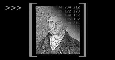

In [78]:
img